In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1_earthquake_1995-2023.csv")
df.reset_index(drop=True, inplace=True)

In [3]:
df.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace = True)

In [4]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.88,167.16,"Sola, Vanuatu",Oceania,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.81,-88.13,"Intipucá, El Salvador",North America,El Salvador
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.38,-160.70,"Sand Point, Alaska",North America,United States of America
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.49,-160.80,Alaska Peninsula,North America,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.63,142.83,"Tungor, Russia",Asia,Russia
970,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.01,169.90,"Vao, New Caledonia",Oceania,New Caledonia
971,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.38,125.13,"Maubara, Timor Leste",Asia,Indonesia
972,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.15,21.70,"Aianí, Greece",Europe,Greece


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      974 non-null    object 
 1   magnitude  974 non-null    float64
 2   date_time  974 non-null    object 
 3   cdi        974 non-null    int64  
 4   mmi        974 non-null    int64  
 5   alert      426 non-null    object 
 6   tsunami    974 non-null    int64  
 7   sig        974 non-null    int64  
 8   net        974 non-null    object 
 9   nst        974 non-null    int64  
 10  dmin       974 non-null    float64
 11  gap        974 non-null    float64
 12  magType    974 non-null    object 
 13  depth      974 non-null    float64
 14  latitude   974 non-null    float64
 15  longitude  974 non-null    float64
 16  location   974 non-null    object 
 17  continent  974 non-null    object 
 18  country    974 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [6]:
df[df["alert"]=="red"]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
28,M 7.8 - Central Turkey,7.8,06-02-2023 01:17,9,9,red,0,2910,us,118,1.9190,32.0,mww,17.925,37.20,37.00,Central Turkey,Asia,Turkiye
56,"M 7.3 - 57 km ENE of Namie, Japan",7.3,16-03-2022 14:36,9,8,red,1,2397,us,0,2.9360,29.0,mww,41.000,37.70,141.59,"Namie, Japan",Asia,Japan
78,"M 7.0 - Acapulco, Mexico",7.0,08-09-2021 01:47,8,8,red,1,2504,us,0,0.0700,43.0,mww,20.000,16.95,-99.79,"Acapulco, Mexico",North America,Mexico
82,"M 7.2 - Nippes, Haiti",7.2,14-08-2021 12:29,9,8,red,1,2331,us,0,1.1780,23.0,mww,10.000,18.35,-73.48,"Nippes, Haiti",North America,Haiti
181,"M 7.5 - 72 km N of Palu, Indonesia",7.5,28-09-2018 10:02,8,8,red,0,2026,us,0,1.6490,13.0,mww,20.000,-0.26,119.85,"Palu, Indonesia",Asia,Indonesia
210,"M 7.3 - 29 km S of ?alabja, Iraq",7.3,12-11-2017 18:18,8,9,red,0,2790,us,0,0.2840,33.0,mww,19.000,34.91,45.96,"?alabja, Iraq",Asia,Iran
218,"M 8.2 - near the coast of Chiapas, Mexico",8.2,08-09-2017 04:49,9,7,red,1,2910,us,0,0.9440,22.0,mww,47.390,15.02,-93.90,"Chiapas, Mexico",North America,Mexico
254,"M 6.6 - 5 km ESE of Preci, Italy",6.6,30-10-2016 06:40,9,8,red,0,2840,us,0,0.1740,25.0,mww,8.000,42.86,13.10,"Preci, Italy",Europe,Italy
268,"M 7.0 - 6 km ESE of Kumamoto, Japan",7.0,15-04-2016 16:25,9,9,red,1,2074,us,0,0.3490,32.0,mww,10.000,32.79,130.75,"Kumamoto, Japan",Asia,Japan
325,"M 7.8 - 67 km NNE of Bharatpur, Nepal",7.8,25-04-2015 06:11,8,9,red,0,2820,us,0,1.8570,12.0,mww,8.220,28.23,84.73,"Bharatpur, Nepal",Asia,Nepal


## Feature Engineering

In [7]:
df_model=df.drop(columns=["title", "location", "continent", "country","date_time"])

In [8]:
df_model

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.88,167.16
1,6.5,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.81,-88.13
2,6.6,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.19,-70.37
3,7.2,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.38,-160.70
4,7.3,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.49,-160.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7.1,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.63,142.83
970,7.7,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.01,169.90
971,6.9,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.38,125.13
972,6.6,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.15,21.70


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'alert' column
df_model['alert'] = encoder.fit_transform(df_model['alert'])

df_model['magType'] = encoder.fit_transform(df_model['magType'])

df_model['net'] = encoder.fit_transform(df_model['net'])

# Display the result
print(df_model)

# To see the mapping of categories to numerical labels
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label Mapping:", label_mapping)


     magnitude  cdi  mmi  alert  tsunami  sig  net  nst      dmin    gap  \
0          6.5    7    4      0        0  657    9  114  7.177000   25.0   
1          6.5    8    6      3        0  775    9   92  0.679000   40.0   
2          6.6    7    5      0        0  899    9   70  1.634000   28.0   
3          7.2    6    6      0        1  860    9  173  0.907000   36.0   
4          7.3    0    5      4        1  820    1   79  0.879451  172.8   
..         ...  ...  ...    ...      ...  ...  ...  ...       ...    ...   
969        7.1    0    9      4        0  776    9    0  0.000000    0.0   
970        7.7    0    4      4        0  912    9    0  0.000000    0.0   
971        6.9    0    6      4        0  732    9    0  0.000000    0.0   
972        6.6    0    9      4        0  670    9    0  0.000000    0.0   
973        7.1    0    7      4        0  776    9    0  0.000000    0.0   

     magType    depth  latitude  longitude  
0          8  192.955    -13.88     167.16

In [10]:
df_model

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,0,657,9,114,7.177000,25.0,8,192.955,-13.88,167.16
1,6.5,8,6,3,0,775,9,92,0.679000,40.0,8,69.727,12.81,-88.13
2,6.6,7,5,0,0,899,9,70,1.634000,28.0,8,171.371,-38.19,-70.37
3,7.2,6,6,0,1,860,9,173,0.907000,36.0,8,32.571,54.38,-160.70
4,7.3,0,5,4,1,820,1,79,0.879451,172.8,0,21.000,54.49,-160.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7.1,0,9,4,0,776,9,0,0.000000,0.0,6,11.000,52.63,142.83
970,7.7,0,4,4,0,912,9,0,0.000000,0.0,5,20.200,-23.01,169.90
971,6.9,0,6,4,0,732,9,0,0.000000,0.0,5,11.200,-8.38,125.13
972,6.6,0,9,4,0,670,9,0,0.000000,0.0,5,14.000,40.15,21.70


In [11]:
train_data = df_model[df_model['alert']!=4]
test_data = df_model[df_model['alert']==4].drop("alert",axis =1)

In [12]:
train_data

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,0,657,9,114,7.1770,25.0,8,192.955,-13.88,167.16
1,6.5,8,6,3,0,775,9,92,0.6790,40.0,8,69.727,12.81,-88.13
2,6.6,7,5,0,0,899,9,70,1.6340,28.0,8,171.371,-38.19,-70.37
3,7.2,6,6,0,1,860,9,173,0.9070,36.0,8,32.571,54.38,-160.70
5,6.6,5,4,0,1,802,9,95,2.4540,37.0,8,10.000,20.02,-61.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,8.0,8,7,0,1,993,9,460,0.0000,20.9,8,24.000,-10.80,165.11
429,6.9,6,7,3,0,814,9,686,0.0000,28.0,8,107.000,42.77,143.09
430,6.8,6,7,0,0,771,9,596,0.0000,19.3,8,45.000,-28.09,-70.65
437,7.4,8,7,3,0,1455,9,751,0.0000,25.5,8,24.000,13.99,-91.90


In [13]:
train_data["net"].unique()

array([9, 0, 6, 2, 4, 5])

In [14]:
test_data

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
4,7.3,0,5,1,820,1,79,0.879451,172.8,0,21.0,54.49,-160.80
62,6.5,0,3,1,650,1,97,1.616070,108.0,0,37.0,52.50,-168.08
63,6.5,0,3,1,650,8,23,0.000000,208.8,0,37.0,52.50,-168.08
65,6.7,0,4,1,691,1,50,0.936943,126.0,0,33.0,52.48,-167.74
66,6.7,0,4,1,691,8,20,0.000000,205.2,0,33.0,52.48,-167.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7.1,0,9,0,776,9,0,0.000000,0.0,6,11.0,52.63,142.83
970,7.7,0,4,0,912,9,0,0.000000,0.0,5,20.2,-23.01,169.90
971,6.9,0,6,0,732,9,0,0.000000,0.0,5,11.2,-8.38,125.13
972,6.6,0,9,0,670,9,0,0.000000,0.0,5,14.0,40.15,21.70


### PCA

Explained Variance Ratio:  [0.22651255 0.13992703 0.1006611  0.09685455 0.08735124 0.07913026
 0.06125947 0.05105015 0.04938773 0.0375099  0.02820875 0.02353819
 0.01860909]
Cumulative Explained Variance:  [0.22651255 0.36643957 0.46710067 0.56395522 0.65130645 0.73043671
 0.79169619 0.84274634 0.89213406 0.92964397 0.95785271 0.98139091
 1.        ]
PCA Components (Feature contributions to principal components):
    magnitude       cdi       mmi   tsunami       sig       net       nst  \
0    0.241721  0.388872  0.437665 -0.009462  0.423097 -0.281945  0.033381   
1    0.246100  0.253551  0.302448  0.065945  0.112361  0.457695  0.064319   
2   -0.405362 -0.129489  0.061238 -0.244664 -0.225078  0.026154  0.538557   
3    0.383672 -0.015087 -0.179698 -0.365470  0.279026 -0.092930  0.225409   
4    0.366175 -0.243414 -0.038937  0.643687 -0.056180 -0.074021  0.480447   
5    0.005954 -0.066256  0.019078  0.346946 -0.126094 -0.411695 -0.229150   
6   -0.081785  0.097097 -0.199268  0.287063 

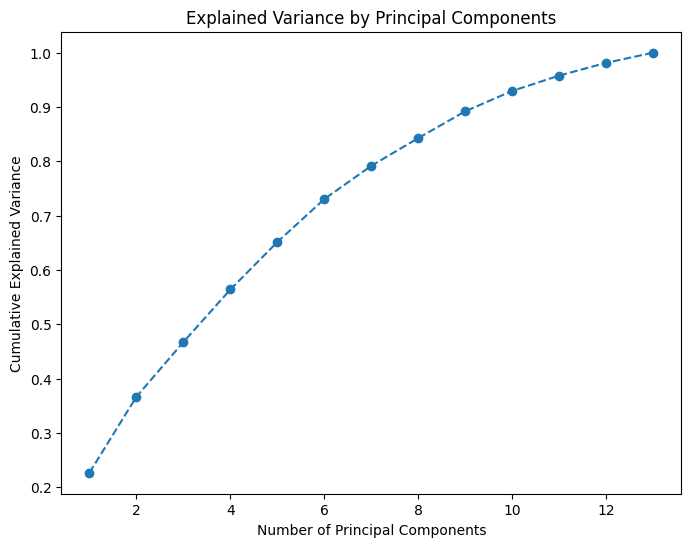

In [15]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame and 'alert' is the target column

# Step 1: Separate the features and target
X = train_data.drop('alert', axis=1)  # Features
y = train_data['alert']  # Target

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio: ", explained_variance_ratio)

# Step 5: Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance: ", cumulative_variance)

# Step 6: Display the components to understand the contribution of each feature
components = pd.DataFrame(pca.components_, columns=X.columns)
print("PCA Components (Feature contributions to principal components):")
print(components)

# If you want to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


Top features contributing to the first principal component:
cdi          0.388872
depth        0.262387
dmin         0.267298
gap          0.192585
latitude     0.271729
longitude    0.145167
magType      0.258453
magnitude    0.241721
mmi          0.437665
net          0.281945
nst          0.033381
sig          0.423097
tsunami      0.009462
Name: 0, dtype: float64


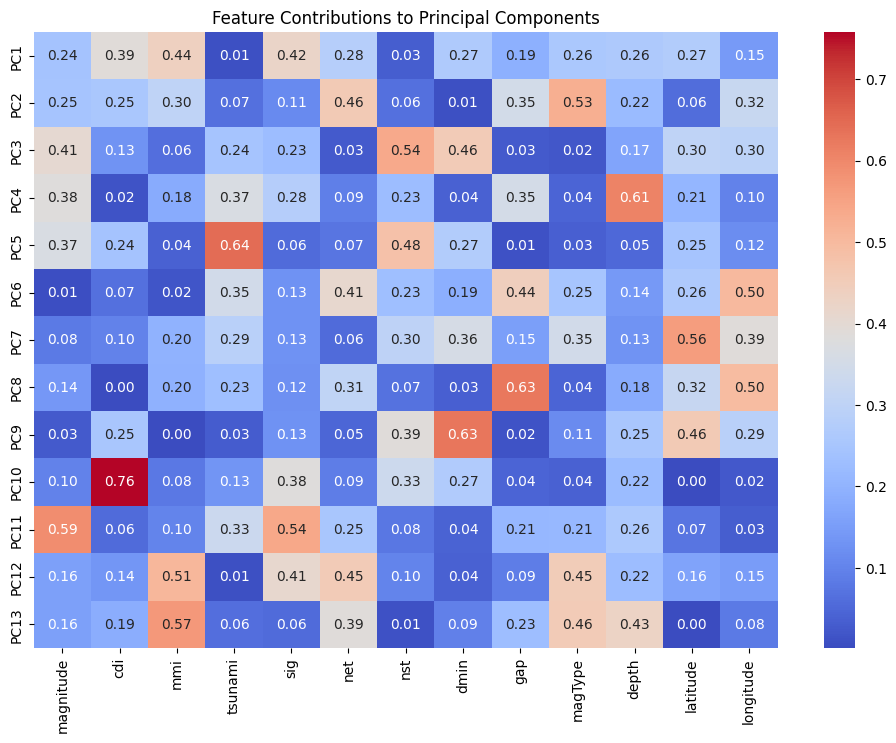

In [24]:
# Step 1: Examine the components to see which features have the largest influence
# We'll sort the absolute values of the coefficients to see which features are most important

# Get the absolute values of the PCA components and sort them
abs_components = np.abs(pca.components_)

# Create a DataFrame of absolute components for each feature
components_df = pd.DataFrame(abs_components, columns=X.columns)

# Sort by the highest contribution for each component (by column)
sorted_components = components_df.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Print sorted components for the first few principal components
print("Top features contributing to the first principal component:")
print(sorted_components.iloc[0])

# Step 2: You can select features that are most important for the first few components.
# E.g., if the first component explains 40% of the variance, you might select the top 5 features with the highest coefficients in the first principal component.

# Step 3: Visualize contribution of features for all components (optional)
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=X.columns, yticklabels=[f"PC{i+1}" for i in range(len(components_df))])
plt.title("Feature Contributions to Principal Components")
plt.show()


Most Important Features:
      Feature  Importance
4         sig    0.256416
2         mmi    0.151624
11   latitude    0.120840
1         cdi    0.080588
7        dmin    0.080466
10      depth    0.072649
8         gap    0.071557
12  longitude    0.068601
0   magnitude    0.059839
6         nst    0.018311
3     tsunami    0.012841
5         net    0.003179
9     magType    0.003089


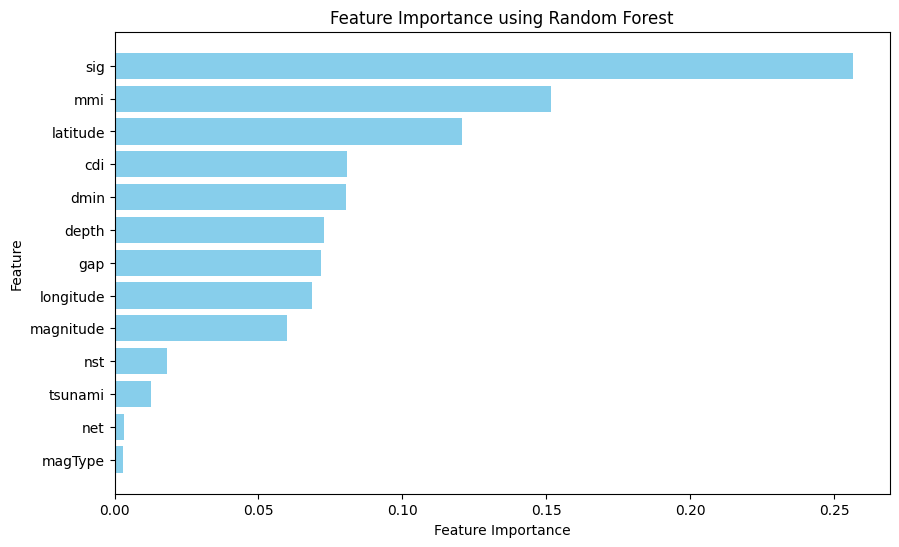

In [25]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame and 'alert' is the target column

# Step 1: Separate the features (X) and the target (y)
X = train_data.drop('alert', axis=1)  # Features
y = train_data['alert']  # Target

# Step 2: Split the data into training and testing sets (optional, depending on your use case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestRegressor for regression
rf.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances = rf.feature_importances_

# Step 5: Create a DataFrame for feature importance (for easy visualization)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Step 6: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Most Important Features:")
print(feature_importance_df)

# Step 7: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Reverse the order to show the most important feature at the top
plt.show()


In [37]:
Most_imp_feature = feature_importance_df["Feature"].unique()[0:5]

## Model Fitting

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming train_data is your DataFrame and 'alert' is the target column

# Step 1: Separate features (X) and target (y)
X = train_data[Most_imp_feature] # Features (drop the target column)
y = train_data['alert']  # Target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Step 4: Fit the model on the training data
rfc.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = rfc.predict(X_test)

# Step 6: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report: Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8721

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        62
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4
           3       0.80      0.29      0.42        14

    accuracy                           0.87        86
   macro avg       0.92      0.78      0.81        86
weighted avg       0.87      0.87      0.85        86


Confusion Matrix:
[[62  0  0  0]
 [ 0  5  0  1]
 [ 0  0  4  0]
 [10  0  0  4]]


In [32]:
!pip install imbalanced-learn
